
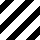
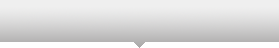
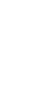
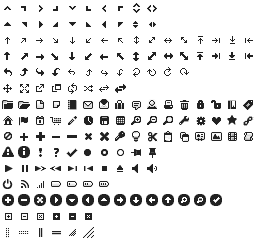
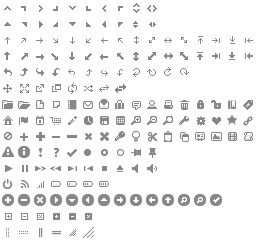
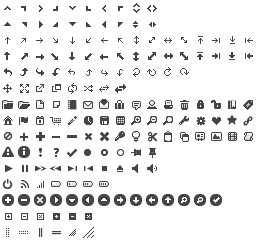
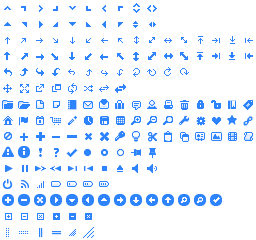
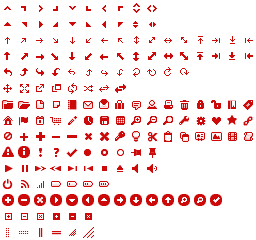
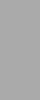
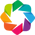
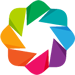
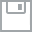
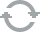
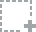
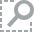
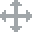
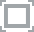
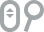

In [146]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from bokeh.plotting import figure, show, output_notebook, gridplot
output_notebook()

###Question 1

In [3]:
####### This is the approach Justin showed up in office hours#########

from sklearn.linear_model import Ridge, Lasso

time = np.array([0, 0.5, 1, 1.5, 2, 2.5])
height = np.array([0, 20.5, 31.36, 36.25, 30.41, 28.23])
print time
print height

p=figure(height=300, width=300)
p.circle(time, height, size=10)
show(p)



[ 0.   0.5  1.   1.5  2.   2.5]
[  0.    20.5   31.36  36.25  30.41  28.23]


In [171]:

x = np.array([0, 0.5, 1, 1.5, 2, 2.5])
y = np.array([0, 20.5, 31.36, 36.25, 30.41, 28.23])
XX = np.c_[x, x**2]
XX

array([[ 0.  ,  0.  ],
       [ 0.5 ,  0.25],
       [ 1.  ,  1.  ],
       [ 1.5 ,  2.25],
       [ 2.  ,  4.  ],
       [ 2.5 ,  6.25]])

In [175]:
results = sm.OLS(y, XX).fit()
results.params

p = figure(title='Loop')
p.circle(x,y)

v, a = results.params
print v, a
x1 = np.array(range(0, 100))* 0.04

y1 = []
for  t in x1:
    y1.append(v*t+a*t**2)
    
p.line(x1, y1, color='red')
show(p)

43.911515528 -13.3832298137


In [176]:
for a, b in zip(x1, y1):
    if (-10 <b) & (b<10):
        print a, b

0.0 0.0
0.04 1.73504745342
0.08 3.42726857143
0.12 5.07666335404
0.16 6.68323180124
0.2 8.24697391304
0.24 9.76788968944
3.04 9.80855055901
3.08 8.28879652174
3.12 6.72621614907
3.16 5.12080944099
3.2 3.47257639752
3.24 1.78151701863
3.28 0.0476313043478
3.32 -1.72908074534
3.36 -3.54861913043
3.4 -5.41098385093
3.44 -7.31617490683
3.48 -9.26419229814


In [187]:
#########This is the approach I used originally ##################

ridge = Ridge(alpha = 1)
clf_ridge = ridge.fit(np.vander(time, 5,increasing=True), height)
score_ridge = ridge.score(np.vander(time, 5,increasing=True), height)

lasso = Lasso(alpha = 0.1)
clf_lasso = lasso.fit(np.vander(time, 3, increasing=True), height)
score_lasso = lasso.score(np.vander(time, 3, increasing=True), height)

p=figure(width=500, height=500)
p.circle(time, height, size=10)

p.line(time,clf_ridge.predict(np.vander(time, 5, increasing=True)), color='blue')
p.line(time,clf_lasso.predict(np.vander(time, 3, increasing=True)), color='red')
show(p)

print "Ridge Coefficients:", clf_ridge.coef_
print "Ridge Intercept:", clf_ridge.intercept_
print "Ridge R-Squared:", score_ridge

print "Lasso Coefficients:", clf_lasso.coef_
print "Lasso Intercept:", clf_lasso.intercept_
print "Lasso R-Squared:", score_lasso

print "Lasso is better fitting and simpler model"

time2 = np.array([3, 3.5, 4, 4.5, 5])
print time2
lasso_ground = clf_lasso.predict(np.vander(time2, 3, increasing=True))
print lasso_ground

print "Based on the Lasso model, the projectile will hit the ground between 3.5 and 4 seconds"



Ridge Coefficients: [ 0.          8.20236373  5.1639788   1.43942998 -1.52267222]
Ridge Intercept: 11.1520169681
Ridge R-Squared: 0.72980257632
Lasso Coefficients: [  0.          39.81496571 -11.96388698]
Lasso Intercept: 2.10686718379
Lasso R-Squared: 0.971444051935
Lasso is better fitting and simpler model
[ 3.   3.5  4.   4.5  5. ]
[ 13.87678153  -5.09836829 -30.05546159 -60.99449839 -97.91547867]
Based on the Lasso model, the projectile will hit the ground between 3.5 and 4 seconds


###Question 2

In [20]:
########Use Statsmodel Library#########

year = np.array([1976, 1980, 1987, 1993, 1998])
cost = np.array([618, 860, 1324, 1865, 2256])

YEAR = sm.add_constant(year, prepend=True)

results = sm.OLS(cost, YEAR).fit()

a, b = results.params
print results.summary()


x = range(max(year)+1, max(year)+21)
    
#print x    

y = []
for val in x:
    y.append(a + b*val)

#print y

predicted = zip(x, y)

predicted
#looks like the cost would reach $2800 in 2006
    

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     614.3
Date:                Fri, 21 Aug 2015   Prob (F-statistic):           0.000144
Time:                        11:42:19   Log-Likelihood:                -25.840
No. Observations:                   5   AIC:                             55.68
Df Residuals:                       3   BIC:                             54.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -1.48e+05   6027.491    -24.555      0.0

[(1999, 2301.9369645042461),
 (2000, 2377.1285189718183),
 (2001, 2452.3200734393613),
 (2002, 2527.5116279069334),
 (2003, 2602.7031823745056),
 (2004, 2677.8947368420486),
 (2005, 2753.0862913096207),
 (2006, 2828.2778457771929),
 (2007, 2903.4694002447359),
 (2008, 2978.660954712308),
 (2009, 3053.852509179851),
 (2010, 3129.0440636474232),
 (2011, 3204.2356181149953),
 (2012, 3279.4271725825383),
 (2013, 3354.6187270501105),
 (2014, 3429.8102815176535),
 (2015, 3505.0018359852256),
 (2016, 3580.1933904527978),
 (2017, 3655.3849449203408),
 (2018, 3730.5764993879129)]

In [76]:
########Use sklearn Library#########

year = np.array([1976, 1980, 1987, 1993, 1998])
cost = np.array([618, 860, 1324, 1865, 2256])

# df = pd.DataFrame(zip(year, cost), columns=list(['Year', 'Cost']) )
# x = df.Year.values
# y = df.Cost.values

year = year.reshape(5, 1)
cost = cost.reshape(5, 1)

from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=True)

lr_clf = LR.fit(year, cost)

print lr_clf.intercept_
print lr_clf.coef_
print LR.score(year, cost)


#####Same results as the Statsmodel#######

[-148005.98408217]
[[ 75.19155446]]
0.995140125339


###Question 3

In [39]:
x = np.array([-1, 0, 1, 2, 3, 5, 7, 9])
y = np.array([-1, 3, 2.5, 5, 4, 2, 5, 4])

len(x)
len(y)

p = figure(height = 300, width=300)
p.circle(x, y, size=5)
show(p)


In [40]:
#####Lasso######

al_param = [1, 0.1, 0.01, .001]
p_all = []
r_squared = []
 
for i in range(1, 21):
    for j in al_param:
        lasso = Lasso(alpha = j)
        q3_lasso = lasso.fit(np.vander(x, i, increasing=True), y)
        q3_lasso_score = lasso.score(np.vander(x, i, increasing=True), y)

        p = figure(height=200, width=200)
        p.circle(x, y, size = 5)
        p.line(x, q3_lasso.predict(np.vander(x, i, increasing=True)), color='red')
        p_all.append(p)
        #print 'alpha=',j,'terms=',i,':', q3_lasso_score
        r = {}
        r['terms']=i
        r['alpha']=j
        r['value']=q3_lasso_score
        r_squared.append(r)

plots = np.array(p_all).reshape(20, 4)

a = gridplot(plots.tolist())
show(a)

r_squared

#print plots


c:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


[[<bokeh.plotting.Figure object at 0x0000000020CF5208>


In [152]:
#####Ridge######

al_param = [0.1, 1, 10, 100]
p_all = []
r_squared = []


for i in range(1, 21):
    for j in al_param:
        ridge = Ridge(alpha = j)
        q3_ridge = ridge.fit(np.vander(x, i, increasing=True), y)
        q3_ridge_score = ridge.score(np.vander(x, i, increasing=True), y)

        p = figure(height=200, width=200)
        p.circle(x, y, size = 5)
        p.line(x, q3_ridge.predict(np.vander(x, i, increasing=True)), color='red')
        p_all.append(p)
        #print 'alpha=',j,'terms=',i,':', q3_lasso_score
        r2 = {}
        r2['terms']=i
        r2['alpha']=j
        r2['value']=q3_ridge_score
        r_squared.append(r2)

plots = np.array(p_all).reshape(20, 4)

a = gridplot(plots.tolist())
show(a)

r_squared

[{'alpha': 0.1, 'terms': 1, 'value': 0.0},
 {'alpha': 1, 'terms': 1, 'value': 0.0},
 {'alpha': 10, 'terms': 1, 'value': 0.0},
 {'alpha': 100, 'terms': 1, 'value': 0.0},
 {'alpha': 0.1, 'terms': 2, 'value': 0.31035736912282774},
 {'alpha': 1, 'terms': 2, 'value': 0.31031631347652899},
 {'alpha': 10, 'terms': 2, 'value': 0.30695483999330164},
 {'alpha': 100, 'terms': 2, 'value': 0.22016437860348037},
 {'alpha': 0.1, 'terms': 3, 'value': 0.49206218093552823},
 {'alpha': 1, 'terms': 3, 'value': 0.48890367797972678},
 {'alpha': 10, 'terms': 3, 'value': 0.40055168105287653},
 {'alpha': 100, 'terms': 3, 'value': 0.20513965989011518},
 {'alpha': 0.1, 'terms': 4, 'value': 0.66108213207731881},
 {'alpha': 1, 'terms': 4, 'value': 0.63989064256168382},
 {'alpha': 10, 'terms': 4, 'value': 0.41118007873001705},
 {'alpha': 100, 'terms': 4, 'value': 0.21728174465302497},
 {'alpha': 0.1, 'terms': 5, 'value': 0.80149131294190645},
 {'alpha': 1, 'terms': 5, 'value': 0.74953888708463201},
 {'alpha': 10, '

###Wine Quality Data

In [65]:
# import urllib
# filename = urllib.urlopen('https://archive.ics.uci.edu/ml/datasets/Wine+Quality/winequality-red.csv')

wine = pd.read_table('winequality-red.csv', index_col=False, header=0, sep=';')
wine.head()
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [66]:
dict = {}

for col in wine.columns:
    dict[col] = wine[col].value_counts()

dict
    

{'alcohol': 9.500000     139
 9.400000     103
 9.800000      78
 9.200000      72
 10.000000     67
 10.500000     67
 9.600000      59
 11.000000     59
 9.300000      59
 9.700000      54
 10.900000     49
 9.900000      49
 10.100000     47
 10.200000     46
 10.800000     42
 10.400000     41
 11.200000     36
 10.300000     33
 11.400000     32
 11.300000     32
 9.000000      30
 11.500000     30
 11.800000     29
 10.600000     28
 11.100000     27
 10.700000     27
 9.100000      23
 11.700000     23
 12.000000     21
 12.500000     21
             ... 
 12.200000     12
 12.300000     12
 12.900000      9
 12.700000      9
 14.000000      7
 13.000000      6
 12.600000      6
 13.600000      4
 13.300000      3
 13.400000      3
 10.550000      2
 8.400000       2
 8.700000       2
 10.033333      2
 13.100000      2
 8.800000       2
 9.550000       2
 9.050000       1
 8.500000       1
 9.566667       1
 11.950000      1
 13.500000      1
 14.900000      1
 9.250000       1

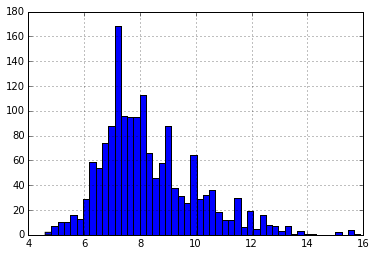

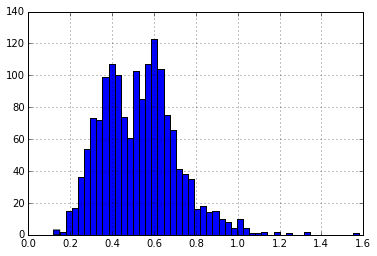

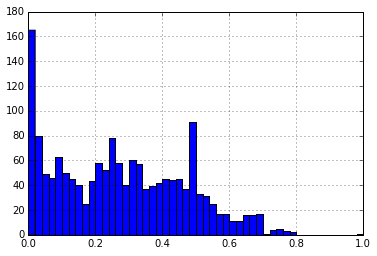

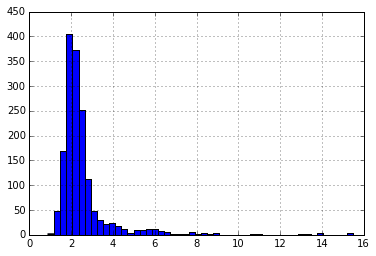

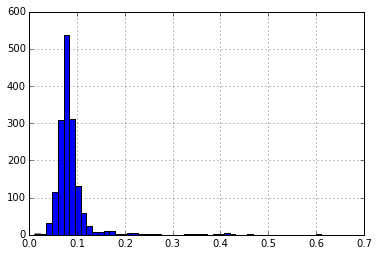

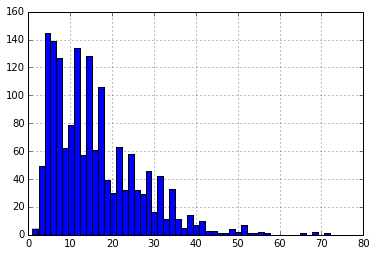

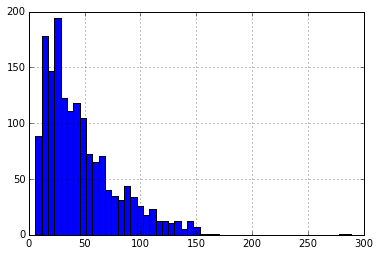

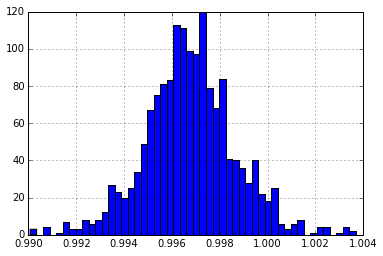

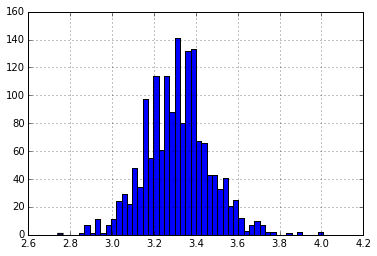

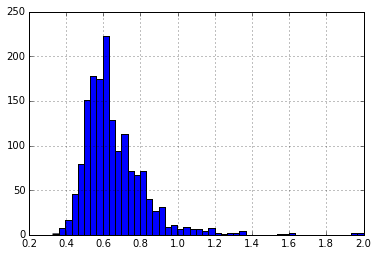

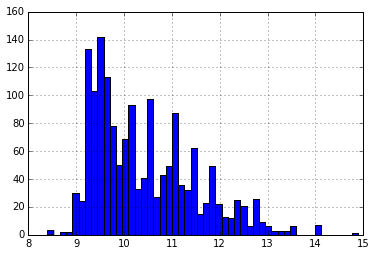

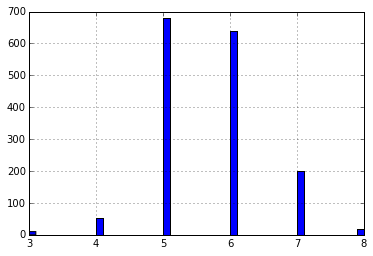

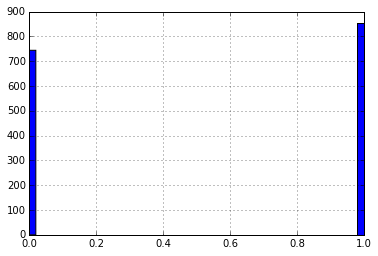

In [192]:
import matplotlib.pyplot as plt

%matplotlib inline 

# hist = []
for col in wine.columns:
    a = wine[col].hist(bins=50)
#     hist.append(a)
    plt.show(a)


# wine_plots = np.array(hist).reshape(4,3)

# # wine_plots
# # wine_gplots = gridplot(wine_plots.tolist())

# # show(a)

# fig, axes = plt.subplots(4, 3, sharex=False, sharey=False)
# for i in range(4):
#     for j in range(3):
#         axes[i, j].hist(wine_plots, bins=50)
# plt.subplots


# wine['fixed acidity'].hist(bins=50)
# wine['volatile acidity'].hist(bins=50)



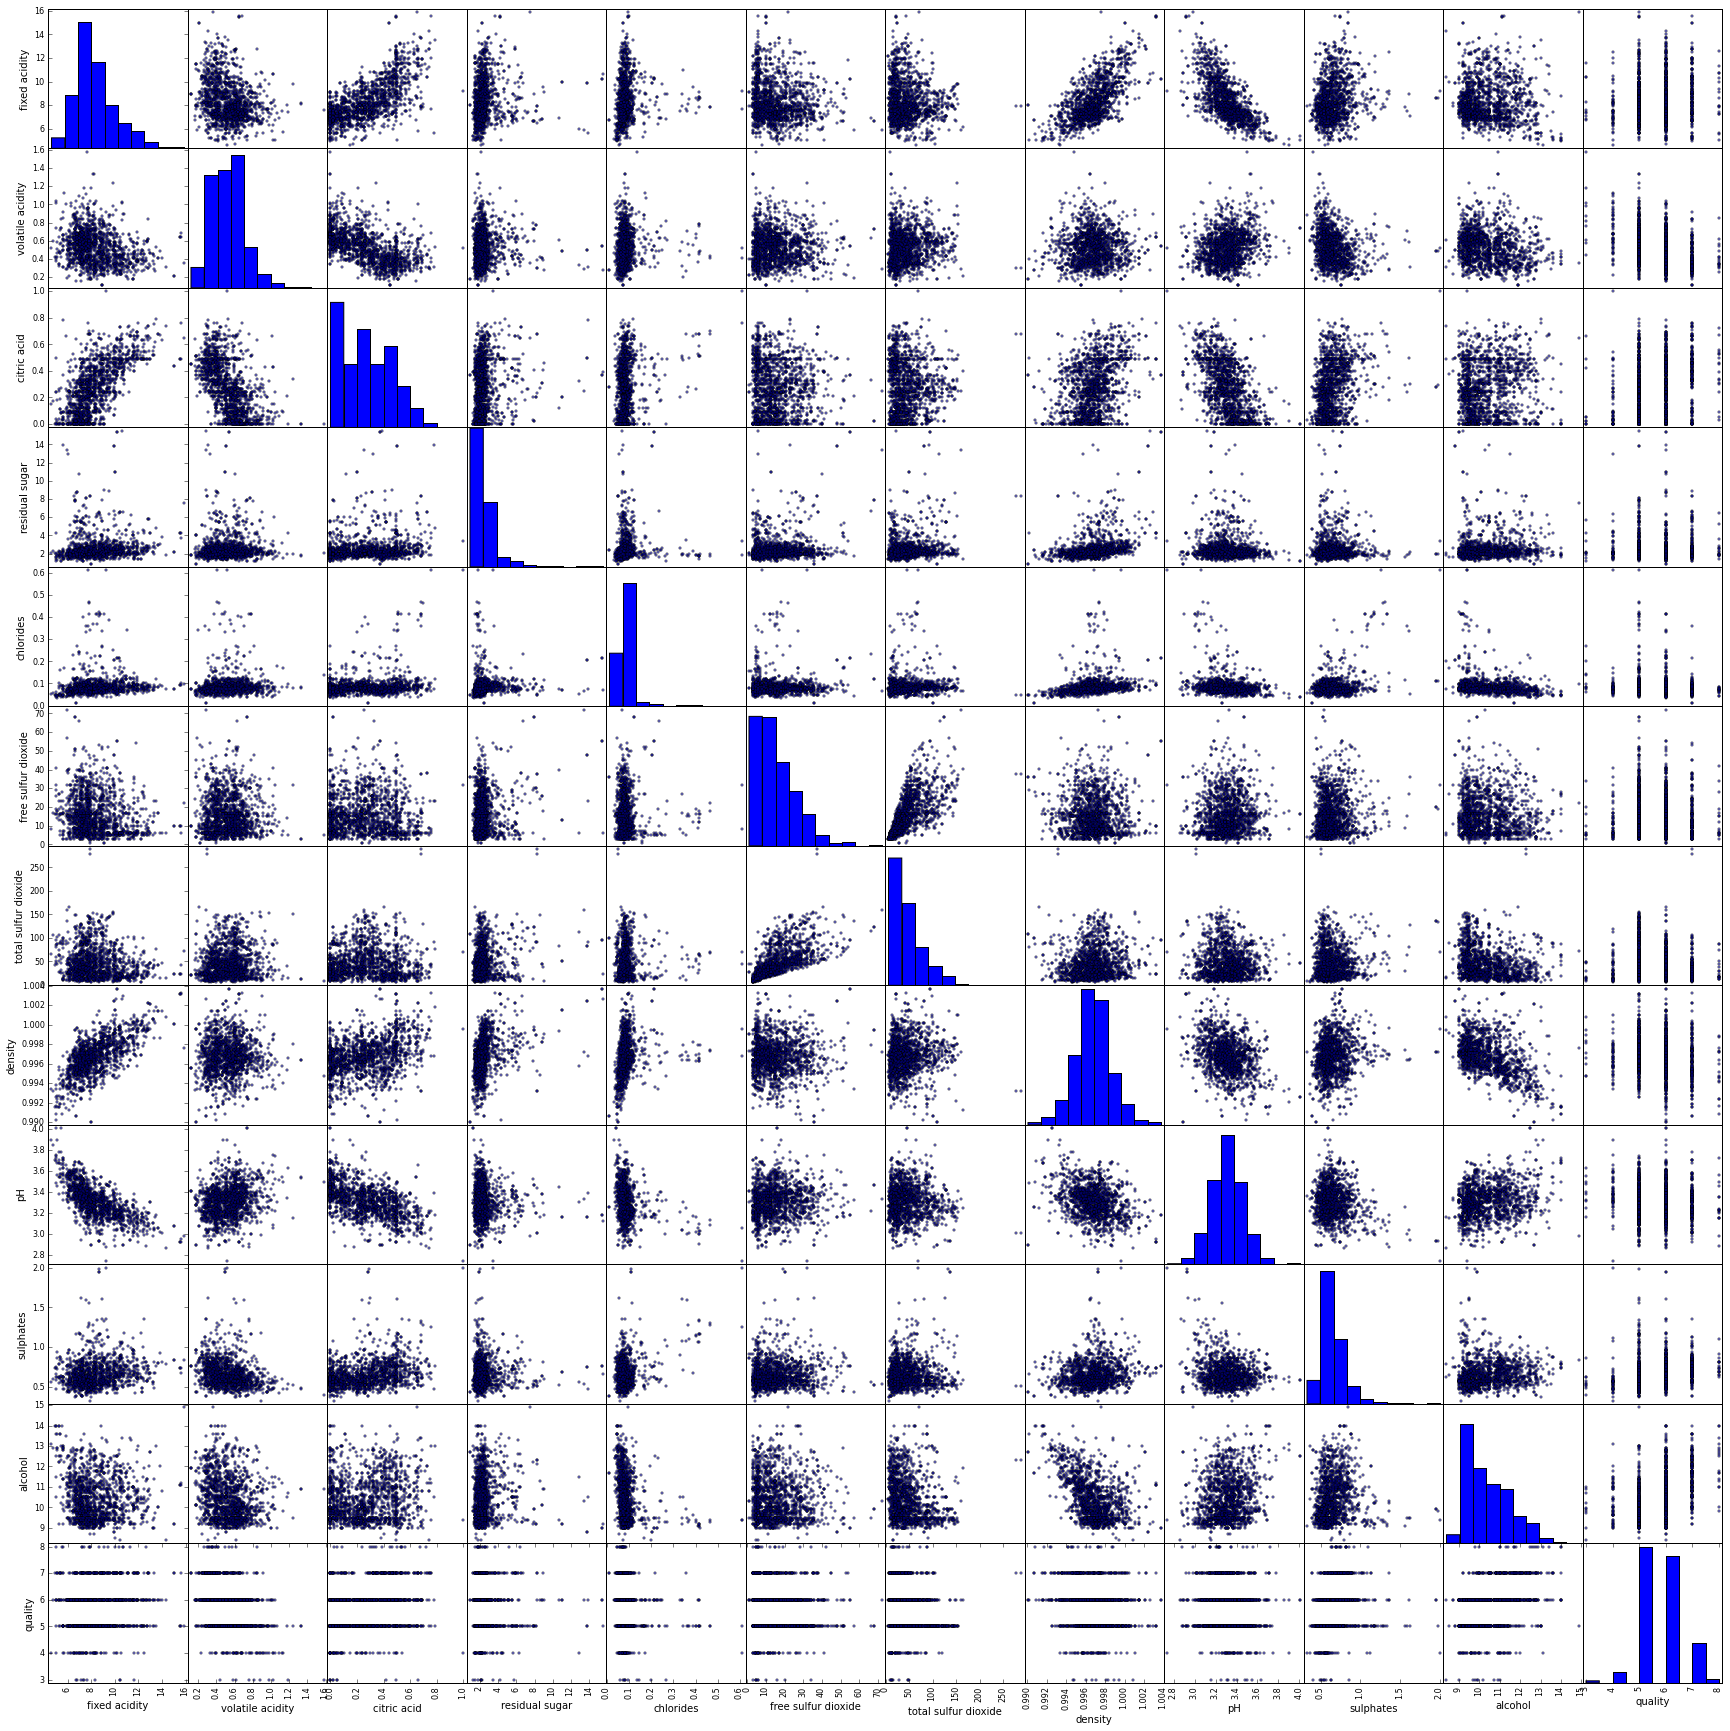

In [54]:
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(wine, figsize = (30,30))

In [69]:
####Convert this into a logistic regression problem######

wine['quality2'] = wine['quality'].astype('str').map({'3':0, '4':0, '5':0, '6':1, '7':1, '8':1}).astype(int)

wine.head()

wine['quality2'].value_counts()

1    855
0    744
dtype: int64

In [128]:
features = wine.drop(['quality', 'quality2'], axis =1 )
target = wine['quality2']

In [106]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

wine_lr = LogisticRegression(C=0.5)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=0)

len(x_train)
len(x_test)


320

In [139]:
lr_clf = wine_lr.fit(x_train, y_train)

pred = lr_clf.predict(x_test)

pred2 = lr_clf.predict(x_train)

correct = 0 

for a, b in zip(y_test, pred):
    if a == b:
        correct +=1
    else:
        pass

print 'Correct number:', correct    
print 'accuracy:', float(correct)/len(y_test)
print metrics.classification_report(pred, y_test)
print metrics.classification_report(pred2, y_train)
print metrics.confusion_matrix(pred, y_test)
print len(pred)

#####This improves the prediction accuracy from a random model of 53% to 74%


Correct number: 237
accuracy: 0.740625
             precision    recall  f1-score   support

          0       0.72      0.72      0.72       149
          1       0.76      0.76      0.76       171

avg / total       0.74      0.74      0.74       320

             precision    recall  f1-score   support

          0       0.74      0.71      0.72       619
          1       0.74      0.76      0.75       660

avg / total       0.74      0.74      0.74      1279

[[107  42]
 [ 41 130]]
320


In [91]:
from sklearn import cross_validation

scores = cross_validation.cross_val_score(wine_lr, features, target, cv=5)

print scores
scores.mean()

[ 0.678125   0.734375   0.759375   0.75       0.7492163]


0.73421826018808778

In [123]:
coeffs = pd.DataFrame(zip(features.columns, lr_clf.coef_.ravel()), columns=['feature', 'coefficients']) 
lr_clf.coef_
lr_clf.coef_.ravel()
coeffs['abs'] = np.absolute(coeffs.coefficients.values)
coeffs.sort('abs', ascending=False)

feature  coefficients       abs
1       volatile acidity     -2.405355  2.405355
8                     pH     -1.668835  1.668835
9              sulphates      1.587494  1.587494
4              chlorides     -0.952145  0.952145
7                density     -0.917135  0.917135
10               alcohol      0.835215  0.835215
2            citric acid     -0.336777  0.336777
3         residual sugar      0.038131  0.038131
0          fixed acidity     -0.036487  0.036487
5    free sulfur dioxide      0.020212  0.020212
6   total sulfur dioxide     -0.017664  0.017664

In [129]:
###########Drop features with low b values to see if prediction accuracy improves##############
#############It does not############

features_short = features.drop(['residual sugar', 'fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide'], axis=1)

wine_lr = LogisticRegression(C=0.5)

x_train, x_test, y_train, y_test = train_test_split(features_short, target, test_size=.2, random_state=0)

lr_clf = wine_lr.fit(x_train, y_train)

pred = lr_clf.predict(x_test)

pred2 = lr_clf.predict(x_train)

correct = 0 

for a, b in zip(y_test, pred):
    if a == b:
        correct +=1
    else:
        pass

print 'Correct number:', correct    
print 'accuracy:', float(correct)/len(y_test)
print metrics.classification_report(pred, y_test)
print metrics.classification_report(pred2, y_train)

Correct number: 237
accuracy: 0.740625
             precision    recall  f1-score   support

          0       0.72      0.72      0.72       149
          1       0.76      0.76      0.76       171

avg / total       0.74      0.74      0.74       320

             precision    recall  f1-score   support

          0       0.74      0.71      0.72       619
          1       0.74      0.76      0.75       660

avg / total       0.74      0.74      0.74      1279



In [222]:
###############Linear Regression#################
############Produced very low RSquared############


from sklearn.linear_model import LinearRegression

features = wine.drop(['quality', 'quality2'], axis =1 )
target2 = wine['quality']

x_train, x_test, y_train, y_test = train_test_split(features, target2, test_size=.2, random_state=0)

linr = LinearRegression()

linr_clf = linr.fit(x_train, y_train)

pred = linr_clf.predict(x_test)

print "R-Squared (training set):", linr.score(x_train, y_train)

# # linr.score(x_test, linr_clf.predict(x_test))

print "R-Squared (test set):", linr.score(x_test, y_test)


# pred = linr_clf.predict(x_test)

# pred
# pred.sort(0)

# linr_clf.coef_


R-Squared (training set): 0.365451961621
R-Squared (test set): 0.328388763958


In [230]:
#####Regularization does not appear to improve R-Squuared

lasso = Lasso(alpha = 0.00001)
clf_lasso = lasso.fit(features, target2)
score_lasso = lasso.score(features, target2)
print "Lasso R-Squared:", score_lasso

ridge = Ridge(alpha = .1)
clf_ridge = ridge.fit(features, target2)
score_ridge = ridge.score(features, target2)
print "Ridge R-Squared:", score_ridge

Lasso R-Squared: 0.360281373776
Ridge R-Squared: 0.360267104891
